In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
data=pd.read_csv('creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

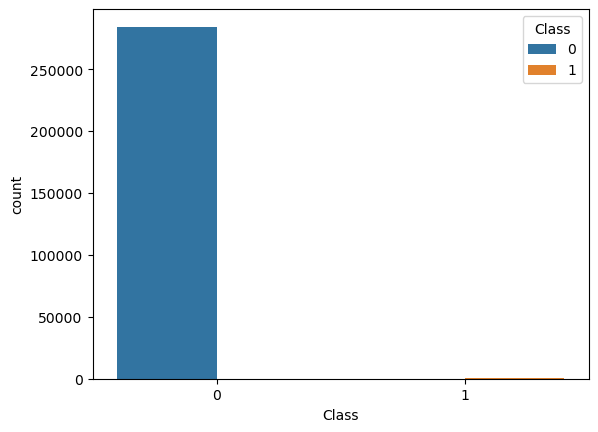

In [9]:
sns.countplot(x='Class',data=data,hue='Class')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
#Splinting the data for fraud and legit transactions
legit =data[data.Class==0]
fraud=data[data.Class==1]

In [13]:
legit.shape

(284315, 31)

In [14]:
fraud.shape

(492, 31)

In [15]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Undersampling

Preparing a unbiased train and test dataset

In [18]:
legits=legit.sample(n=492)

In [19]:
newdata=pd.concat([legits,fraud],axis=0)

In [20]:
newdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
133125,80259.0,-0.870319,0.183155,2.510376,-0.868037,-0.517022,-0.062201,0.271531,0.204612,0.465916,...,-0.063099,-0.052253,0.044455,0.487972,-0.222016,0.786281,0.023050,0.097417,53.02,0
199608,133050.0,1.941024,-0.507832,-0.294046,0.541634,-0.854127,-0.584475,-0.607006,-0.046449,1.538607,...,0.252979,0.935978,0.061844,0.001287,-0.059196,-0.153323,0.035340,-0.035312,29.95,0
256706,157817.0,2.012257,-0.120909,-1.011331,0.325476,-0.158660,-0.949622,0.063384,-0.176685,0.321385,...,-0.234815,-0.594406,0.342776,0.069162,-0.351271,0.173690,-0.076448,-0.069789,1.98,0
283046,171331.0,-1.812422,1.620389,-1.244873,-0.721847,-0.287765,-0.768551,-0.268897,1.266290,-0.229602,...,-0.208216,-0.600620,0.382091,-0.493392,-0.282915,0.169562,0.026713,-0.039266,10.77,0
103939,68859.0,1.572441,-1.213639,-1.153023,-2.500236,0.979841,3.235834,-1.485561,0.746395,-1.985077,...,-0.266291,-0.525249,-0.002477,0.981843,0.548044,-0.191426,0.032333,0.014574,15.00,0


In [21]:
newdata['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [22]:
newdata.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93956.302846,0.064919,0.068169,0.064831,0.032926,0.058689,0.096676,0.067748,0.048879,0.005570,...,-0.007231,0.029944,-0.033392,-0.023329,0.001764,0.026109,0.001940,-0.040206,-0.015930,91.218557
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Splitting fro train and test data

In [23]:
x=newdata.drop(columns='Class',axis=1)

In [24]:
y=newdata['Class']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


### Model implementation

In [27]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [28]:
x_train_predi=model.predict(x_train)
train_accuray=accuracy_score(x_train_predi,y_train)
print("Accuracy score on train data :",train_accuray)

Accuracy score on train data : 0.9237611181702668


In [29]:
x_test_pred=model.predict(x_test)
test_acc=accuracy_score(x_test_pred,y_test)
print("Accuracy score on test data :",test_acc)

Accuracy score on test data : 0.9137055837563451


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [31]:
y_pred = model.predict(x_test)
y_true = y_test

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9473684210526315
Recall: 0.8823529411764706
F1-score: 0.9137055837563451
